# IRIS

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iris = pd.read_csv(r"C:\Users\KIIT\Downloads\iris.csv",header=None)
iris.columns = ['SL','SW','PL','PW','Name']
iris

,SL,SW,PL,PW,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
iris.isnull().sum()

SL      0
SW      0
PL      0
PW      0
Name    0
dtype: int64

In [4]:
for i in iris.columns:
    print(i,':','\n',iris[i].unique())

SL : 
 [5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9]
SW : 
 [3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2.  2.2 2.5 2.6]
PL : 
 [1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 6.1 5.3
 5.5 6.7 6.9 5.7 6.4 5.4 5.2]
PW : 
 [0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3]
Name : 
 ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [5]:
#label encoding

In [5]:
from sklearn.preprocessing import LabelEncoder

lr = LabelEncoder()
iris.Name = lr.fit_transform(iris.Name)

In [6]:
iris.Name.unique()

array([0, 1, 2])

In [8]:
lr.inverse_transform([0, 1, 2])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

#Encoding

for i in ['Name']:
    iris[i] = lr.fit_transform(iris[i])

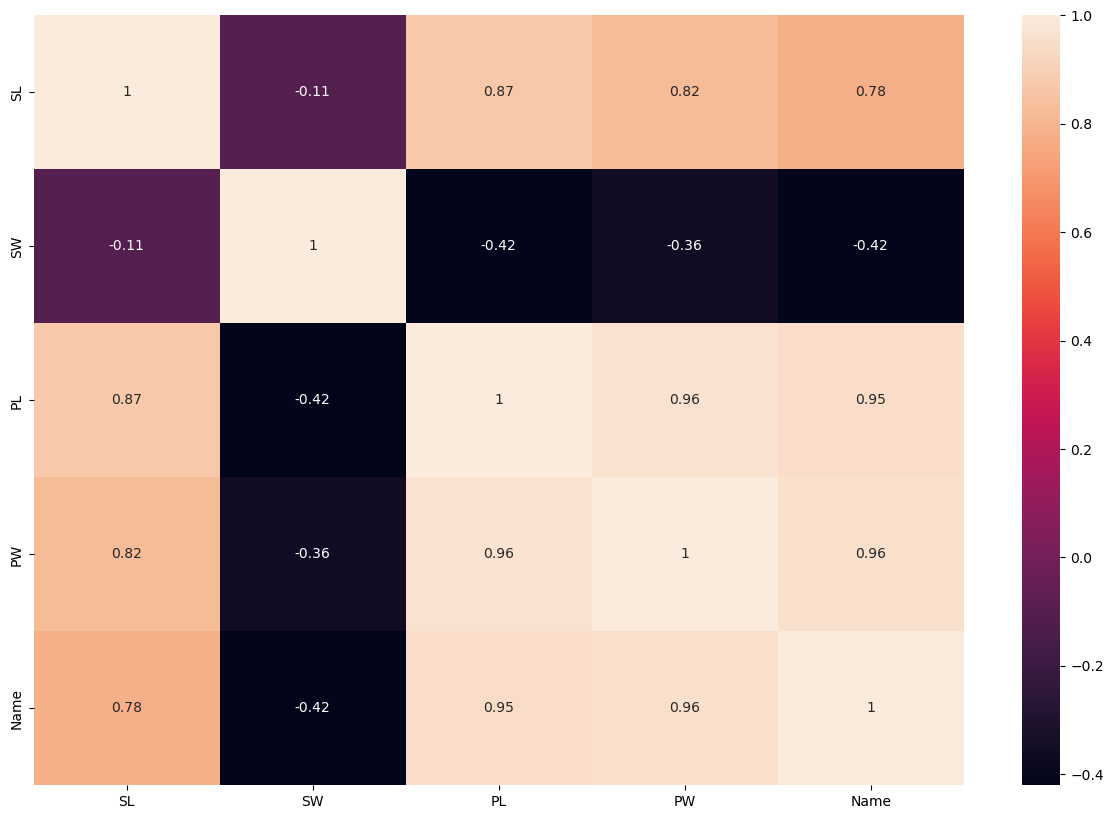

In [9]:
plt.figure(figsize=(15,10))
cor = iris.corr()
sns.heatmap(cor,annot=True)
plt.show()

In [10]:
#ip/op creation

ip = iris.drop('Name',axis=1)
op = iris.Name

In [12]:
#train_test_split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(ip,op,test_size=0.2,train_size=0.8)

In [13]:
#Standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [14]:
#logistic regression

from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()

lg.fit(x_train,y_train)

LogisticRegression()

In [15]:
ypred = lg.predict(x_test)

In [16]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

a = accuracy_score(ypred,y_test)
b = recall_score(ypred,y_test,average='micro')
print(f"accuracy_score : {a} \n recall_score : {b}")


accuracy_score : 0.9666666666666667 
 recall_score : 0.9666666666666667


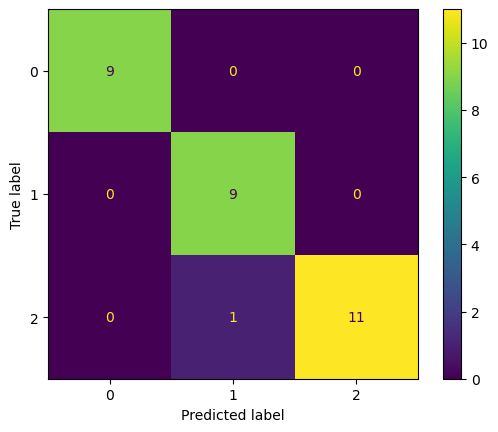

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

cm = confusion_matrix(y_test,ypred)

cmd = ConfusionMatrixDisplay(cm)
cmd.plot()
plt.show()

In [18]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(x_train,y_train)

GaussianNB()

In [19]:
ypred1 = nb.predict(x_test)
ypred1

array([2, 1, 1, 1, 2, 0, 0, 0, 0, 1, 1, 2, 1, 2, 0, 2, 0, 2, 2, 0, 2, 1,
       0, 1, 1, 2, 0, 2, 2, 2])

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score,precision_score,f1_score
a= accuracy_score(ypred1,y_test)
b = recall_score(ypred1,y_test,average='micro')
c= f1_score(ypred1,y_test,average='micro')
d = precision_score(ypred1,y_test,average='micro')

print(f"accuracy_score : {a} \n recall_score : {b} \n f1_score : {c} \n precision_score : {d}")

accuracy_score : 1.0 
 recall_score : 1.0 
 f1_score : 1.0 
 precision_score : 1.0


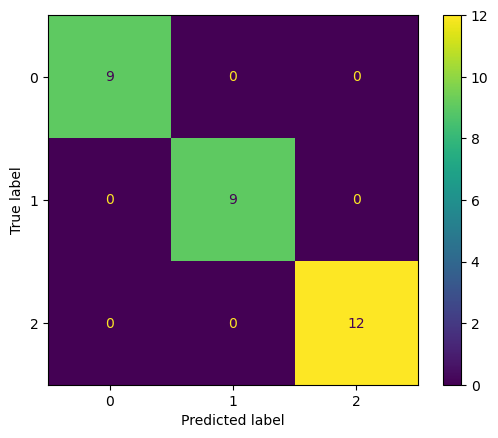

In [21]:
cm1 = confusion_matrix(y_test,ypred1)
cmd1 = ConfusionMatrixDisplay(cm1)
cmd1.plot()
plt.show()

In [22]:
ypred

array([2, 1, 1, 1, 2, 0, 0, 0, 0, 1, 1, 2, 1, 2, 0, 2, 0, 2, 2, 0, 1, 1,
       0, 1, 1, 2, 0, 2, 2, 2])

In [23]:
y_test

128    2
83     1
58     1
60     1
139    2
38     0
1      0
42     0
48     0
66     1
51     1
130    2
99     1
107    2
8      0
125    2
32     0
112    2
100    2
2      0
129    2
68     1
15     0
67     1
61     1
110    2
23     0
122    2
116    2
121    2
Name: Name, dtype: int32

In [24]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

km = KNeighborsClassifier(n_neighbors=3)
km.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [25]:
ypred2 = km.predict(x_test)

C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [26]:
a= accuracy_score(ypred2,y_test)
b = recall_score(ypred2,y_test,average='micro')
c= f1_score(ypred2,y_test,average='micro')
d = precision_score(ypred2,y_test,average='micro')
print(f"accuracy_score : {a} \n recall_score : {b} \n f1_score : {c} \n precision_score : {d}")

accuracy_score : 0.8333333333333334 
 recall_score : 0.8333333333333334 
 f1_score : 0.8333333333333334 
 precision_score : 0.8333333333333334


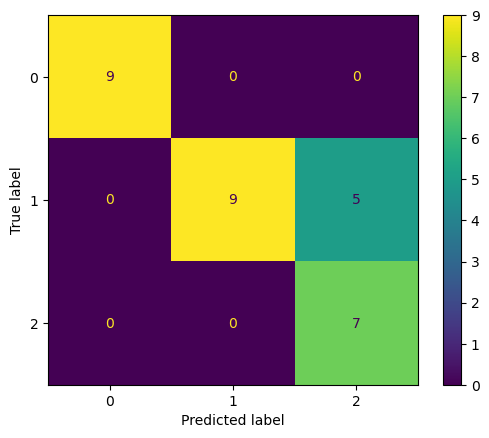

In [27]:
cm2 = confusion_matrix(ypred2,y_test)
cmd2 = ConfusionMatrixDisplay(cm2)
cmd2.plot()
plt.show()

In [28]:
#SVM 

from sklearn.svm import SVC

svc = SVC()#kernel='rbf',C=1000,gamma=0.01)
svc.fit(x_train,y_train)

SVC()

In [29]:
ypred3 = svc.predict(x_test)

In [30]:
accuracy = accuracy_score(ypred3,y_test)
recall = recall_score(ypred3,y_test,average='micro')
precision = precision_score(ypred3,y_test,average='micro')
f1 = f1_score(ypred3,y_test,average='micro')

print('accuracy :',accuracy)
print('recall :',recall)
print('precision :',precision)
print('f1score :',f1)

accuracy : 0.9666666666666667
recall : 0.9666666666666667
precision : 0.9666666666666667
f1score : 0.9666666666666667


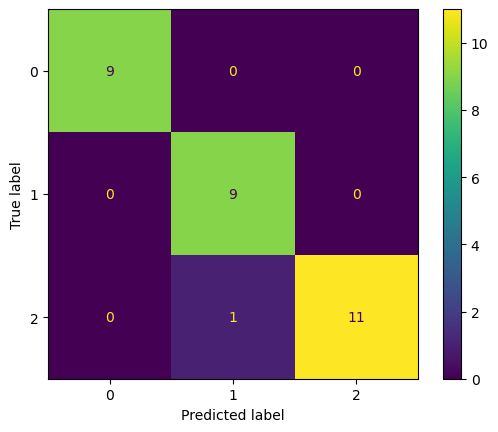

In [31]:
ypred3 =svc.predict(x_test)
cm4 = confusion_matrix(y_test,ypred3)
cmd3=ConfusionMatrixDisplay(cm4)
cmd3.plot()
plt.show()